In [1]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn import preprocessing

In [2]:
data=pd.read_csv('/home/lenovo/Downloads/train_20D8GL3.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0


In [3]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.00000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14949.183667,167214.746667,1.607571,1.854190,1.551714,35.461619,-0.01119,-0.127238,-0.164857,-0.21819,...,43387.372476,40398.551095,38931.194000,5686.349333,5.923003e+03,5202.325333,4793.172000,4797.012952,5211.736762,0.221190
std,8632.775153,128965.188482,0.488303,0.791628,0.521176,9.206628,1.12321,1.198957,1.198624,1.17221,...,64081.073110,60396.811177,59196.499234,16868.075695,2.390953e+04,17006.416467,15467.403159,15270.031988,17698.795697,0.415058
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.00000,-2.000000,-2.000000,-2.00000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7508.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.00000,-1.000000,-1.000000,-1.00000,...,2332.000000,1759.000000,1242.750000,998.250000,8.360000e+02,390.000000,284.000000,241.000000,102.000000,0.000000
50%,14939.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.00000,0.000000,0.000000,0.00000,...,19158.500000,18266.500000,17203.500000,2100.000000,2.011000e+03,1811.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22386.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.00000,0.000000,0.000000,0.00000,...,55376.750000,50517.250000,49463.000000,5023.250000,5.000000e+03,4500.000000,4002.250000,4051.000000,4000.000000,0.000000
max,29998.000000,800000.000000,2.000000,6.000000,3.000000,75.000000,8.00000,8.000000,8.000000,8.00000,...,706864.000000,587067.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000,1.000000


In [4]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

In [5]:
data[data.columns[1:]].corr()['default_payment_next_month'][:]

LIMIT_BAL                    -0.159163
SEX                          -0.037634
EDUCATION                     0.021347
MARRIAGE                     -0.016888
AGE                           0.006664
PAY_0                         0.325851
PAY_2                         0.263546
PAY_3                         0.235930
PAY_4                         0.220079
PAY_5                         0.208783
PAY_6                         0.188985
BILL_AMT1                    -0.028493
BILL_AMT2                    -0.022796
BILL_AMT3                    -0.022824
BILL_AMT4                    -0.020185
BILL_AMT5                    -0.015790
BILL_AMT6                    -0.015480
PAY_AMT1                     -0.076042
PAY_AMT2                     -0.059409
PAY_AMT3                     -0.067720
PAY_AMT4                     -0.059574
PAY_AMT5                     -0.063666
PAY_AMT6                     -0.061206
default_payment_next_month    1.000000
Name: default_payment_next_month, dtype: float64

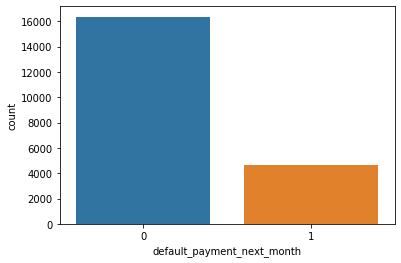

In [6]:
sns.countplot(data['default_payment_next_month'])

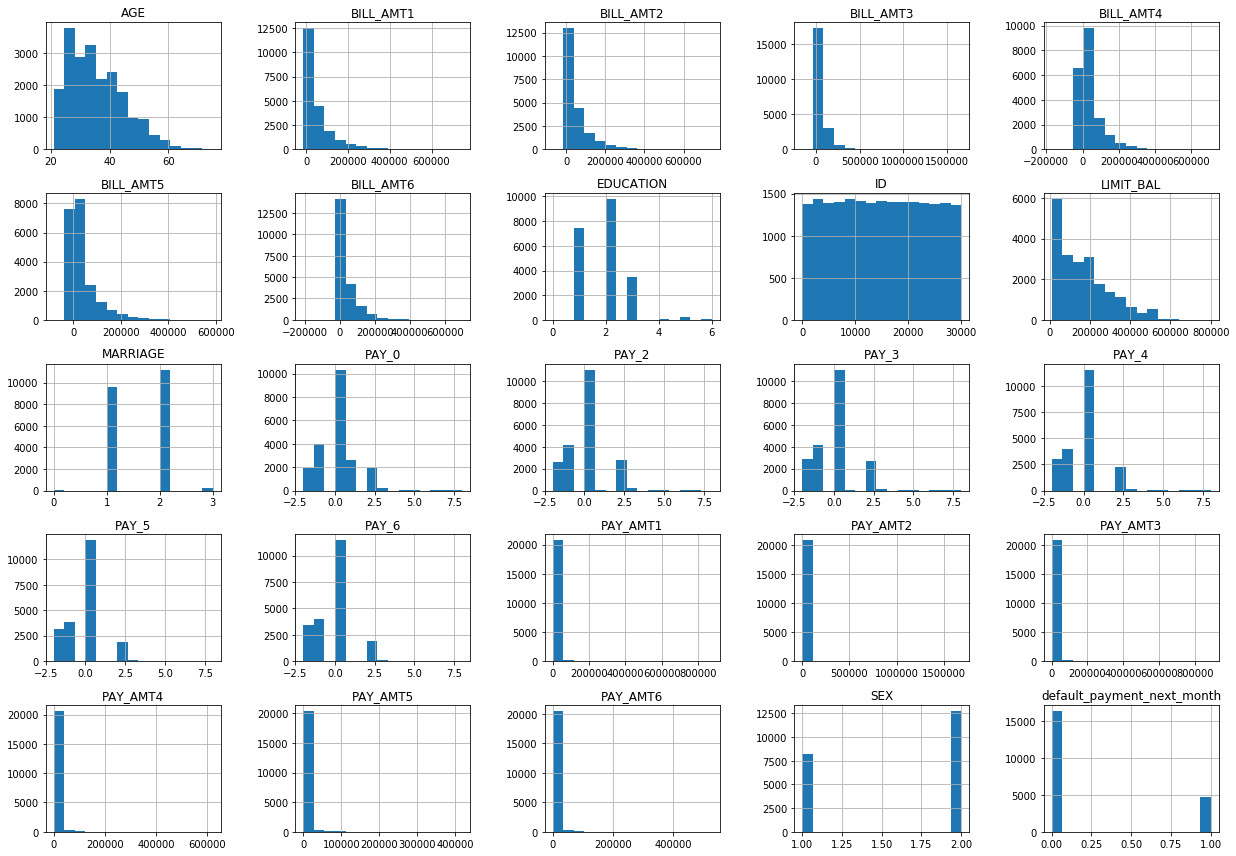

In [7]:
data.hist(bins=15)    
plt.tight_layout(rect=(0, 0, 3,3)) 

In [8]:
corr=data.corr()
corr.style.background_gradient(cmap='coolwarm')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
ID,1,0.0293091,0.02336,0.0350087,-0.0251292,0.0177255,-0.0293467,-0.0116431,-0.0198459,-0.00492229,-0.0217577,-0.019846,0.0146602,0.0154187,0.0187072,0.0387372,0.0150782,0.0157576,0.00742798,0.00497795,0.0437743,0.0127066,0.0038343,0.00145311,-0.0167011
LIMIT_BAL,0.0293091,1,0.0296834,-0.216762,-0.110451,0.143206,-0.272059,-0.297323,-0.290059,-0.269652,-0.253399,-0.235601,0.290539,0.283654,0.288947,0.297446,0.297377,0.291518,0.194995,0.176589,0.206638,0.199472,0.221325,0.215073,-0.159163
SEX,0.02336,0.0296834,1,0.0110116,-0.0339297,-0.0929075,-0.0612317,-0.0726023,-0.0644063,-0.0612418,-0.0559202,-0.0450449,-0.031595,-0.0302872,-0.0233283,-0.0174304,-0.0142779,-0.0135456,0.0039069,0.000397555,-0.00391975,4.23923e-05,0.00216503,0.00375947,-0.0376342
EDUCATION,0.0350087,-0.216762,0.0110116,1,-0.143085,0.172253,0.105815,0.119132,0.110223,0.103607,0.0947025,0.0800331,0.0278263,0.0228341,0.0156983,0.0023176,-0.00524285,-0.00643597,-0.0421637,-0.0325726,-0.0458537,-0.0416198,-0.0356201,-0.0310975,0.0213467
MARRIAGE,-0.0251292,-0.110451,-0.0339297,-0.143085,1,-0.414239,0.0294204,0.0324031,0.0439882,0.0422449,0.0447792,0.0431233,-0.0261332,-0.023962,-0.0277125,-0.0246478,-0.0261431,-0.0209298,-0.00222693,-0.00663351,1.80135e-05,-0.0140607,-0.00337527,-0.00555489,-0.0168879
AGE,0.0177255,0.143206,-0.0929075,0.172253,-0.414239,1,-0.0433134,-0.05509,-0.0588913,-0.0573236,-0.0610182,-0.0506684,0.0541865,0.0538195,0.0534389,0.0499682,0.0483767,0.0474653,0.0254389,0.0225008,0.0258421,0.0264275,0.0242955,0.0168461,0.00666448
PAY_0,-0.0293467,-0.272059,-0.0612317,0.105815,0.0294204,-0.0433134,1,0.669158,0.573421,0.540895,0.506958,0.472545,0.18312,0.184325,0.173635,0.175132,0.176809,0.172138,-0.0853397,-0.0704035,-0.0795091,-0.0658297,-0.0617254,-0.0650418,0.325851
PAY_2,-0.0116431,-0.297323,-0.0726023,0.119132,0.0324031,-0.05509,0.669158,1,0.768036,0.662055,0.621775,0.573462,0.230246,0.229404,0.21719,0.218108,0.217404,0.215069,-0.0831564,-0.0600318,-0.0642623,-0.0518364,-0.0419903,-0.0422523,0.263546
PAY_3,-0.0198459,-0.290059,-0.0644063,0.110223,0.0439882,-0.0588913,0.573421,0.768036,1,0.780378,0.692843,0.635996,0.205603,0.233152,0.222866,0.224166,0.222599,0.220174,-0.00445815,-0.0632488,-0.0589436,-0.0505622,-0.034179,-0.0390495,0.23593
PAY_4,-0.00492229,-0.269652,-0.0612418,0.103607,0.0422449,-0.0573236,0.540895,0.662055,0.780378,1,0.826037,0.720236,0.199066,0.2226,0.240683,0.242503,0.240128,0.236392,-0.0140702,-0.00161554,-0.0731253,-0.0469599,-0.0321121,-0.0316985,0.220079


In [9]:
X=data[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
y=data['default_payment_next_month']
transform= preprocessing.MinMaxScaler()


In [10]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
knn=KNeighborsClassifier()
X

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,25150,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,12590,3479,3446,8870,2020,27043
1,13470,240000,2,1,2,46,2,2,-2,-1,0,-1,0,0,2240,0,2267,3074
2,3092,320000,2,2,1,41,0,0,0,0,0,0,5000,2000,2000,3000,3000,1500
3,13973,50000,2,2,2,24,-1,-1,-2,-2,-2,-2,0,0,0,0,0,0
4,10567,80000,1,3,1,52,-1,0,0,0,0,0,1500,1500,1500,1028,876,1449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,6283,50000,2,2,2,31,1,-2,-2,-2,-2,-2,0,0,0,0,0,0
20996,25589,80000,2,2,1,37,0,0,0,0,0,0,5000,3000,2000,4000,2000,2000
20997,4378,100000,1,1,1,52,1,2,2,2,0,0,0,3600,0,6000,3000,0
20998,8604,90000,2,2,1,47,0,0,0,0,0,0,2000,2000,2000,2000,2000,2000


In [11]:
depth_range=list(range(1,30))
estim=[320,330,340]
param1=dict(max_depth=depth_range,n_estimators=estim)

grid1=GridSearchCV(clf1,param1,cv=10,scoring='accuracy')
param1

{'max_depth': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 'n_estimators': [320, 330, 340]}

In [12]:
#grid1.fit(X,y)

In [13]:
#@=grid1.best_params_.

In [14]:
k_range=list(range(1,31))
weight_range=['distance','uniform']
param=dict(n_neighbors=k_range,weights=weight_range)
param

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 'weights': ['distance', 'uniform']}

In [15]:
grid=GridSearchCV(knn,param,cv=10,scoring='accuracy')

In [16]:
#grid.fit(X,y)

In [17]:
#grid.best_score_


In [18]:
#grid.best_params_

In [19]:
#grid.best_estimator_

In [20]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [21]:
#kn=knn.predict(X_test)

In [22]:
#kn

In [23]:
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import confusion_matrix
#score=accuracy_score(y_test,kn)
#score

In [24]:
#conf_matrix=confusion_matrix(y_test,kn)
#conf_matrix

In [7]:
testing_data=pd.read_csv('/home/lenovo/Downloads/test_O6kKpvt.csv')

In [8]:
testing_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,10178,60000,2,2,1,30,0,0,0,0,...,38117,38874,38667,39544,1628,1618,1375,1403,1520,1205
1,5304,200000,2,1,2,29,0,0,0,0,...,76593,93988,50292,10510,4160,14593,20150,0,5739,12050
2,5187,230000,1,1,2,39,0,0,0,0,...,20650,0,0,0,2500,2000,0,0,0,0
3,14495,150000,1,1,2,40,0,0,0,0,...,145978,139791,142745,146872,5800,5245,5200,5200,6500,7200
4,20444,140000,1,2,2,27,0,0,0,0,...,76230,77954,78953,81848,10000,10000,3393,3260,5000,3000


In [9]:
X_testing=testing_data[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]


In [10]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn import preprocessing

In [11]:
from sklearn.model_selection import GridSearchCV
data=pd.read_csv('/home/lenovo/Downloads/train_20D8GL3.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X=data[[ 'LIMIT_BAL','PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
y=data['default_payment_next_month']
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=4)

clf = RandomForestClassifier(max_depth=30,n_estimators=100, random_state=0)
_
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [63]:
prediction=clf.predict(X)
prediction

array([0, 0, 0, ..., 1, 0, 0])

In [56]:
from sklearn.metrics import accuracy_score
score=accuracy_score(prediction,y)
score

0.9858095238095238

In [43]:
#test_file=pd.read_csv('/home/lenovo/Downloads/test_O6kKpvt.csv')

In [44]:
#test_file['default_payment_next_month']=prediction

In [45]:
#testing=test_file[['ID','default_payment_next_month']]
#testing.to_csv('random_forest.csv',index=False)

In [65]:
clf.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [68]:
test_prediction=clf.predict(Xtest)

In [69]:
score1=accuracy_score(test_prediction,ytest)

In [71]:
score1

0.8097619047619048

In [72]:
Xtest.shape

(4200, 11)